## Chapter 6. Probability
- The laws of probability, so true in general, so fallacious in particular. by Edward Gibbon
- Notationally, we write P(E) to mean “the probability of the event E.”

### Dependence and Independence
- Roughly speaking, we say that two events E and F are dependent if knowing something about whether E happens gives us information about whether F happens (and vice versa). Otherwise they are independent.

- P(E, F) = P(E) * P(F)

### Conditional Probability

- P(E, F) = P(E) * P(F)
- P(E l F) = P(E, F) / P(F)
- P(E, F) = P(E l F) * P (F)
- P(E l F) = P(E) // E and F are independent

1. Each child is equally likely to be a boy or a girl
2. The gender of the second child is independent of the gender of the first child

- Now we can ask what is the probability of the event “both children are girls” (B) conditional on the event “the older child is a girl” (G)?

- P (B l G) = P(B, G) / P(G) = P(B) / P(G) = 1/2

- We could also ask about the probability of the event “both children are girls” conditional on the event “at least one of the children is a girl” (L). Surprisingly, the answer is different from before! As before, the event B and L (“both children are girls and at least one of the children is a girl”) is just the event B. This means we have:

- P (B l L) = P(B,L) / P(L) = P(B) / P(L) = 1/3

In [1]:
def random_kid():
    return random.choice(["boy", "girl"])

In [2]:
both_girls = 0
olrder_girl = 0
either_girl = 0

In [4]:
import random
random.seed(0)

In [10]:
if __name__ == "__main__":
    #
    # CONDITIONAL PROBABILITY
    #
    both_girls = 0
    older_girl = 0
    either_girl = 0
    random.seed(0)
    for _ in range(10000):
        younger = random_kid()
        older = random_kid()
        if older == "girl":
            older_girl += 1
        if older == "girl" and younger == "girl":
            both_girls += 1
        if older == "girl" or younger == "girl":
            either_girl += 1

In [12]:
from __future__ import division
from collections import Counter
import math, random

In [14]:
print "P(both | older):", both_girls / older_girl 

P(both | older): 0.514228456914


In [21]:
print "P(both | either): ", both_girls / either_girl

P(both | either):  0.341541328364


### Bayes's Theorem

- P(E l F) = P(E,F) / P(F) = P(F l E) P(E) / P(F)
- P(F) = P(F,E) + P(F, ㄱE)
- P(E l F) = P(F l E) P(E) / [P(FlE)P(E) + P(FlㄱE)/P(ㄱE)]
- This theorem often gets used to demonstrate why data scientists are smarter than doctors. Imagine a certain disease that affects 1 in every 10,000 people. And imagine that there is a test for this disease that gives the correct result (“diseased” if you have the disease, “nondiseased” if you don’t) 99% of the time.
- What does a positive test mean? Let’s use T for the event “your test is positive” and D for the event “you have the disease.” Then Bayes’s Theorem says that the probability that you have the disease, conditional on testing positive, is:
- P(D l T) = P(T l D) P(D) / [P(T l D) P(D) + P(T l ㄱD)P(ㄱD)]

### Random Variables
- A random variable is a variable whose possible values have an associated probability distribution.
- A very simple random variable equals 1 if a coin flip turns up heads and 0 if the flip turns up tails. A more complicated one might measure the number of heads observed when flipping a coin 10 times or a value picked from range(10) where each number is equally likely.

- We will sometimes talk about the expected value of a random variable, which is the average of its values weighted by their probabilities. The coin flip variable has an expected value of 1/2 (= 0 * 1/2 + 1 * 1/2), and the range(10) variable has an expected value of 4.5.

### Continuous Distributions
- A coin flip corresponds to a discrete distribution 
- Often we’ll want to model distributions across a continuum of outcomes.
- Because there are infinitely many numbers between 0 and 1, this means that the weight it assigns to individual points must necessarily be zero. For this reason, we represent a continuous distribution with a probability density function (pdf) such that the probability of seeing a value in a certain interval equals the integral of the density function over the interval.

In [22]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [26]:
random.random()

0.21973714158949476

In [27]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is <= x"
    if x < 0: return 0 # uniform random is never less than 0
    elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
    else: return 1 # uniform random is always less than 1

In [35]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

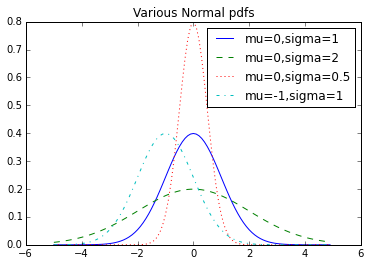

In [42]:
#The Normal Distribution  : bell curve–shaped distribution
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

![](https://upload.wikimedia.org/math/8/d/0/8d013e36afdc75d274722601f2e7ba3f.png)

In [43]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

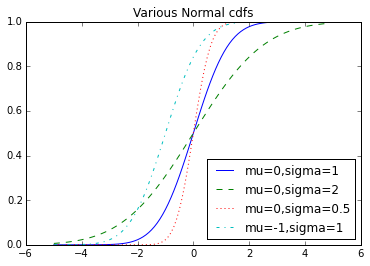

In [44]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [47]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

### The Central Limit Theorem
- One reason the normal distribution is so useful is the central limit theorem, which says (in essence) that a random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately normally distributed. In particular, if are random variables with mean and standard deviation , and if n is large, then:

- https://ko.wikipedia.org/wiki/%EC%A4%91%EC%8B%AC%EA%B7%B9%ED%95%9C%EC%A0%95%EB%A6%AC


In [48]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [49]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [50]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
        for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()